# Imports

In [2]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data 

<table>
  <thead>
    <tr>
      <th><strong>#</strong></th>
      <th><strong>컬럼명</strong></th>
      <th><strong>컬럼 설명</strong></th>
      <th><strong>컬럼 타입</strong></th>
      <th><strong>비고</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>enter.main_page</td>
      <td>서비스 메인페이지 진입</td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>2</td>
      <td>enter.signup_page</td>
      <td>회원가입 페이지 진입</td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>3</td>
      <td>complete.signup</td>
      <td>회원가입 완료</td>
      <td>로그인 방식</td>
      <td></td>
    </tr>
    <tr>
      <td>4</td>
      <td>enter.content_page</td>
      <td>콘텐츠 개별 페이지 진입</td>
      <td>콘텐츠 id</td>
      <td></td>
    </tr>
    <tr>
      <td>5</td>
      <td>click.content_page_start_content_button</td>
      <td>콘텐츠 시청하기 버튼 클릭</td>
      <td>콘텐츠 id, 버튼 이름</td>
      <td></td>
    </tr>
    <tr>
      <td>6</td>
      <td>click.content_page_more_review_button</td>
      <td>콘텐츠 후기 더보기 버튼 클릭</td>
      <td>콘텐츠 id</td>
      <td></td>
    </tr>
    <tr>
      <td>7</td>
      <td>enter.payment_page</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>8</td>
      <td>complete.subscription</td>
      <td>첫 결제 완료</td>
      <td>요금제 종류, 쿠폰 종류, 쿠폰 혜택 종류, 정상가, 할인가, 할인액, 결제수단 타입</td>
      <td>첫 결제가 중복인 경우는 첫 결제 환불 후 다시 결제한 케이스로 간주</td>
    </tr>
    <tr>
      <td>9</td>
      <td>renew.subscription</td>
      <td>정기 결제 완료</td>
      <td>요금제 종류, 쿠폰 종류, 쿠폰 혜택 종류, 정상가, 할인가, 할인액, 결제수단 타입</td>
      <td></td>
    </tr>
    <tr>
      <td>10</td>
      <td>resubscribe.subscription</td>
      <td>만료 후 재구독 완료</td>
      <td>요금제 종류, 쿠폰 종류, 쿠폰 혜택 종류, 정상가, 할인가, 할인액, 결제수단 타입</td>
      <td></td>
    </tr>
    <tr>
      <td>11</td>
      <td>start.free_trial</td>
      <td></td>
      <td>콘텐츠 id, 요금제 종류, 정상가</td>
      <td></td>
    </tr>
    <tr>
      <td>12</td>
      <td>start.content</td>
      <td>콘텐츠 시청 시작</td>
      <td>콘텐츠 id, 콘텐츠 이용가</td>
      <td>22년 8월부터 수집된 테이블입니다.</td>
    </tr>
    <tr>
      <td>13</td>
      <td>enter.episode_page</td>
      <td>에피소드 시청 시작</td>
      <td>콘텐츠 id, 에피소드 id, 무료체험 여부</td>
      <td>콘텐츠는 여러개의 에피소드로 구성되어있습니다. ex) 콘텐츠 = 빅뱅이론 / 에피소드 = 빅뱅이론 1화, 빅뱅이론 2화 ....</td>
    </tr>
    <tr>
      <td>14</td>
      <td>complete.episode</td>
      <td>에피소드 시청 완료</td>
      <td>콘텐츠 id, 에피소드 id</td>
      <td></td>
    </tr>
    <tr>
      <td>15</td>
      <td>click.episode_page_related_comment_box</td>
      <td>에피소드 페이지 내 댓글보기 버튼 클릭</td>
      <td>콘텐츠 id, 에피소드 id, 댓글 id</td>
      <td></td>
    </tr>
    <tr>
      <td>16</td>
      <td>end.content</td>
      <td>콘텐츠 시청 완료</td>
      <td>콘텐츠 id</td>
      <td>콘텐츠 내 모든 에피소드를 시청하면 해당 테이블에 로그가 쌓임</td>
    </tr>
    <tr>
      <td>17</td>
      <td>click.cancel_plan_button</td>
      <td>구독 취소 버튼 클릭</td>
      <td></td>
      <td>구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주</td>
    </tr>
  </tbody>
</table>

# Exploratory Data Analysis

<p style="color:skyblue";>Function</p>
get_table_info with pandas

In [38]:
# Function to gather column stats (nulls, dtype, etc.)
def get_table_info(table_name, duckdb_connection):
    """
    Gather statistics for a given table in a DuckDB database.

    Parameters
    ----------
    table_name : str
        Name of the table to gather statistics for
    duckdb_connection : duckdb.DuckDBPyConnection
        A DuckDB connection object

    Returns
    -------
    pd.DataFrame
        A DataFrame with the following columns:
        - dataset_names: Name of the dataset
        - shape: Shape of the dataset (row, col)
        - features: Name of the feature
        - duplicate_count: Number of duplicate rows
        - null_count: Number of null values in the column
        - null_ratio: Ratio of null values in the column
        - dtype: Data type of the column
        - unique_count: Number of unique values in the column
    """
    # Query the DuckDB table and load into a DataFrame
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, duckdb_connection)
    # df = duckdb_connection.execute(query).df()

    stats = []

    # Get total number of rows
    total_rows = len(df)
    # Get total number of columns
    total_cols = len(df.columns)

    # Count duplicate rows
    duplicate_count = df.duplicated().sum()

    # Loop through each column to gather statistics
    for col in df.columns:
        # Get number of null values in the column
        null_count = df[col].isna().sum()
        # Calculate the null ratio
        null_ratio = round((null_count / total_rows), 2)
        # Get the column data type
        dtype = df[col].dtype
        # Get quantity of unique values for the column
        unique_count = df[col].nunique()
        # Append stats for the column
        stats.append(
            [
                table_name,
                col,
                null_count,
                null_ratio,
                dtype,
                unique_count,
                duplicate_count,
            ]
        )

    # Convert the stats list to a DataFrame
    stats_df = pd.DataFrame(
        stats,
        columns=[
            "dataset_names",
            "features",
            "null_count",
            "null_ratio",
            "dtype",
            "unique_count",
            "duplicate_count",
        ],
    )

    # Add total rows and total columns as additional columns
    stats_df["shape"] = f"({total_rows}, {total_cols})"

    col_orders = [
        "dataset_names",
        "shape",
        "features",
        "duplicate_count",
        "null_count",
        "null_ratio",
        "dtype",
        "unique_count",
    ]

    return stats_df[col_orders]

<p style="color:skyblue";>Function</p>
color_table_by_column_unique_values with seaborn

In [39]:
# Color different column unique values into different colors
def color_table_by_column_unique_values(df, column, palette):
    """
    Color a DataFrame based on the unique values in a given column.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to color
    column : str
        The name of the column with unique values to color
    palette : str
        Name of the seaborn palette to use for coloring

    Returns
    -------
    pd.DataFrame
        A styled DataFrame with font colors changed based on the column
    """
    tables = df[column].unique()
    # Get colors from the seaborn dark palette
    colors = sns.color_palette(palette, len(tables))  # dark

    # Create a color map for each dataset name
    color_map = {table: colors[i] for i, table in enumerate(tables)}

    # Function to style the DataFrame with font colors based on dataset names
    def style_font_color(row):
        color = color_map[row[column]]
        color_hex = (
            f"rgb({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)})"
        )
        return [f"color: {color_hex}"] * len(row)

    # Function to apply the colors to each row based on dataset_name
    def style_background_color(row):
        color = color_map[row[column]]
        return [
            f"background-color: rgba({color[0] * 255}, {color[1] * 255}, {color[2] * 255}, 0.8)"
        ] * len(row)

    # Apply styling to the DataFrame
    styled_df = df.style.apply(style_background_color, axis=1)

    return styled_df

get all the table names

In [40]:
data_path = "./data/data_parquet"
csv_files = os.listdir(f"{data_path}")
tables = [
    name.replace(".parquet", "") for name in csv_files if name.endswith(".parquet")
]
sorted(tables)

['click_cancel_plan_button',
 'click_content_page_more_review_button',
 'click_content_page_start_content_button',
 'click_episode_page_related_comment_box',
 'complete_episode',
 'complete_signup',
 'complete_subscription',
 'end_content',
 'enter_content_page',
 'enter_episode_page',
 'enter_main_page',
 'enter_payment_page',
 'enter_signup_page',
 'renew_subscription',
 'resubscribe_subscription',
 'start_content',
 'start_free_trial']

get info of all tables and save to a csv format

In [41]:
# Initialize DuckDB connection:
duckdb_con = duckdb.connect('./my_database.duckdb')

# Apply to all tables and merge the results
df_all_stats = pd.concat([get_table_info(table, duckdb_con) for table in tables]).reset_index(drop=True)

# Close the connection when done
duckdb_con.close()

# Save df_all_stats meta
df_all_stats.to_csv('./my_metadata.csv', header=True, index=False)

show metadata table with color code

In [42]:
df_metadata = pd.read_csv("./my_metadata.csv")

# Display the styled DataFrame
df_styled = color_table_by_column_unique_values(df_metadata, "dataset_names", "dark")
df_styled

,dataset_names,shape,features,duplicate_count,null_count,null_ratio,dtype,unique_count
0,click_episode_page_related_comment_box,"(1379136, 15)",city,84,23461,0.020000,object,965
1,click_episode_page_related_comment_box,"(1379136, 15)",client_event_time,84,0,0.000000,object,1378994
2,click_episode_page_related_comment_box,"(1379136, 15)",country,84,14891,0.010000,object,54
3,click_episode_page_related_comment_box,"(1379136, 15)",device_carrier,84,1379136,1.000000,float64,0
4,click_episode_page_related_comment_box,"(1379136, 15)",device_family,84,1,0.000000,object,73
5,click_episode_page_related_comment_box,"(1379136, 15)",device_type,84,6334,0.000000,object,165
6,click_episode_page_related_comment_box,"(1379136, 15)",event_type,84,0,0.000000,object,1
7,click_episode_page_related_comment_box,"(1379136, 15)",language,84,0,0.000000,object,18
8,click_episode_page_related_comment_box,"(1379136, 15)",os_name,84,1,0.000000,object,22
9,click_episode_page_related_comment_box,"(1379136, 15)",os_version,84,213,0.000000,object,912


In [8]:
df = pd.read_parquet(
    "./data/data_parquet/click_content_page_start_content_button.parquet",
    engine="pyarrow",
)
df.info()
df
df.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,button.name,genre.id,genre.name,button_name
0,Daejeon,2023-04-05 21:14:38.432000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,None,None,None
1,Seongnam-si,2023-04-10 14:57:20.033000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,112.0.1722.34,Web,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,None,None,None
2,Yangp'yong,2023-04-10 14:28:29.515000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,111.0.0.0,Web,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,None,None,None
3,Seo-gu,2023-04-10 14:09:30.564000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,콘텐츠 이어보기,None,None,None
4,Seo-gu,2023-04-10 14:10:52.368000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172906,Daedeok-gu,2023-10-10 05:57:01.036000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,117.0.0.0,Web,None,8a72eed73d3f9d3ab1771548070e7338,콘텐츠 구독하기,None,None,None
172907,Gangnam-gu,2023-10-10 05:02:56.671000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Avast Secure Browser,116.0.0.0,Web,None,61b6463287573f00de13a930805a52d6,콘텐츠 구독하기,None,None,None
172908,Seodaemun-gu,2023-10-10 05:15:44.437000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,117.0.0.0,Web,b27f37352be57de11cd62c262b2e1628,f4be1a0fe0e301b03115591777fddf29,콘텐츠 구독하기,None,None,None
172909,Seo-gu,2023-10-10 05:41:43.314000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,117.0.0.0,Web,None,b314d5aba64a0aab40602cb72a4a1504,콘텐츠 구독하기,None,None,None


In [9]:
import missingno as msno

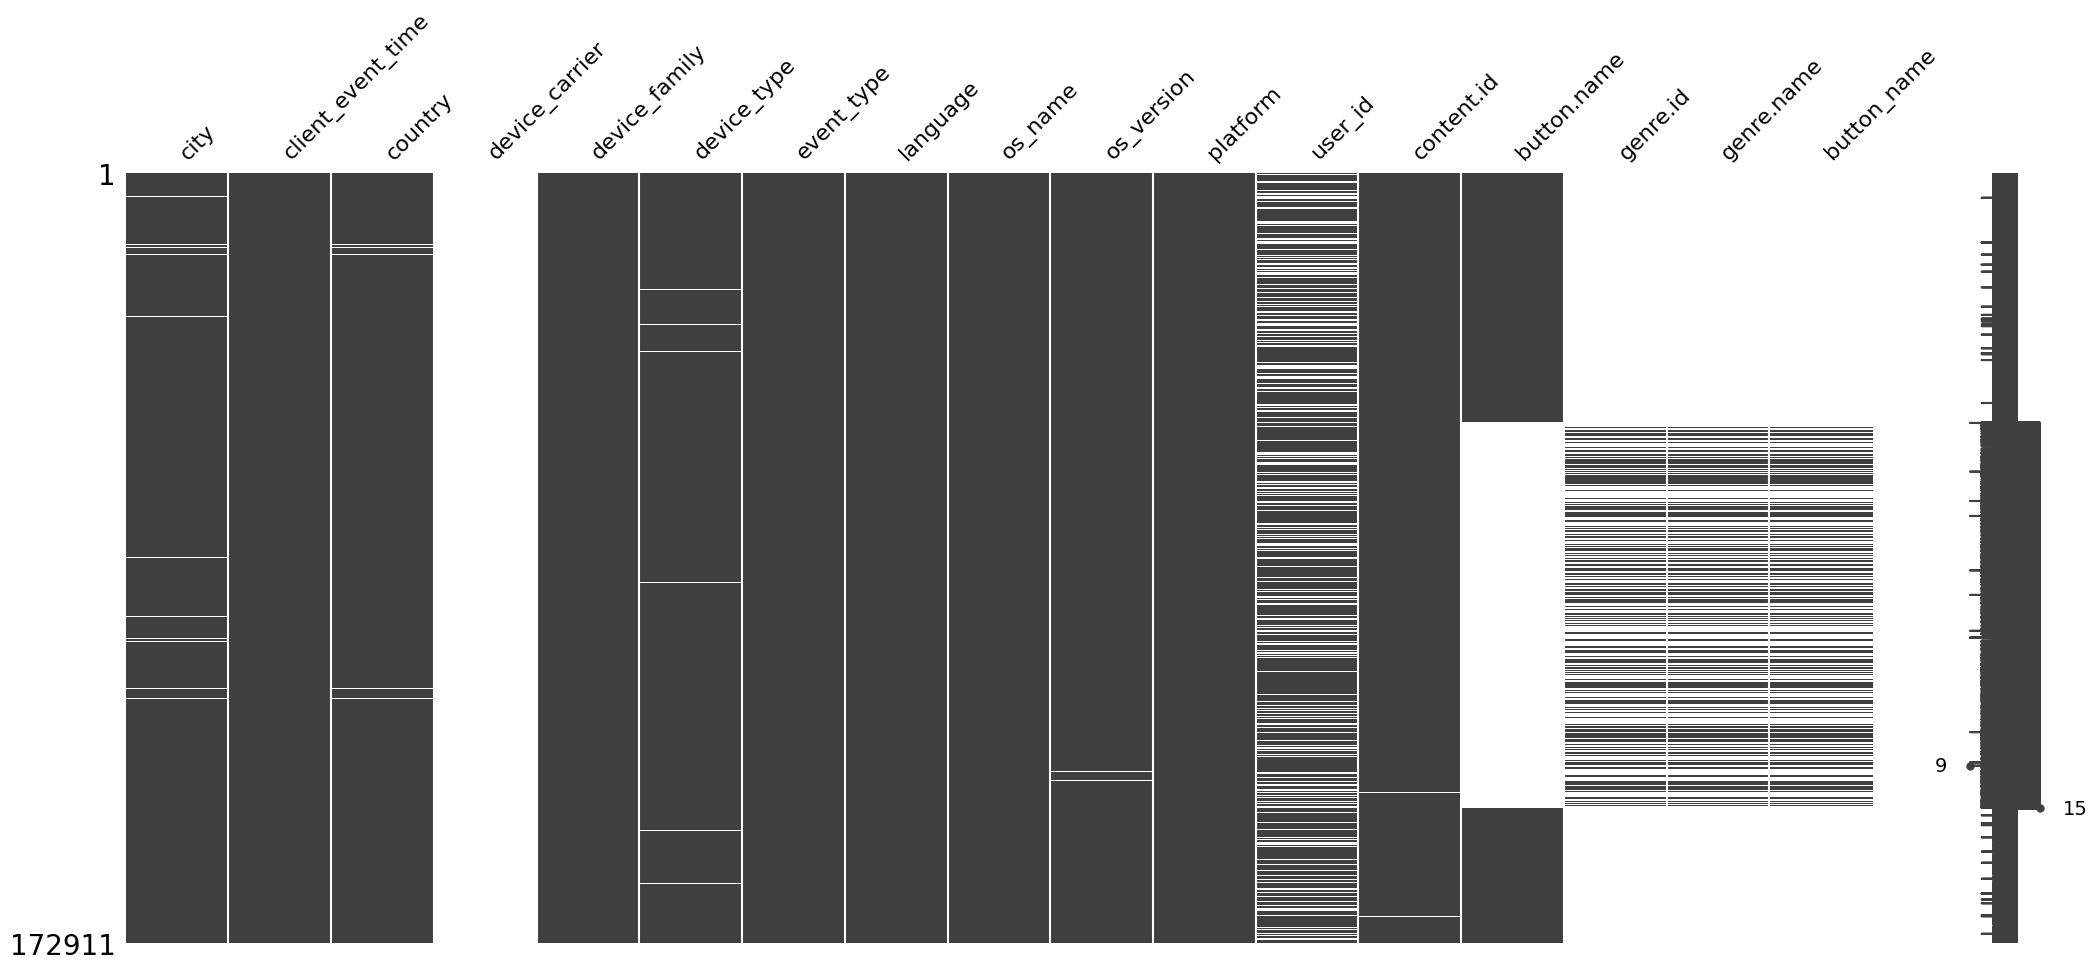

In [10]:
msno.matrix(df)
plt.show()

In [11]:
df["genre.name"].value_counts()

genre.name
다큐멘터리 - 자연        9212
리얼리티 쇼 - 오디션      6342
드라마 - 역사          2857
스릴러 - 미스터리        2798
드라마 - 청춘 성장       2474
드라마 - 코미디         1783
예능 - 관찰           1482
리얼리티 쇼 - 공포       1365
예능 - 토크쇼          1112
판타지 - 마법          1102
드라마 - 정치          1068
스릴러 - 액션           980
다큐멘터리 - 경제         760
판타지 - 애니메이션        726
코미디 - 로맨틱          720
판타지 - 고전           646
다큐멘터리 - 인물         624
드라마 - 직장           582
코미디 - 오피스          569
single_content     412
다큐멘터리 - 고전         385
리얼리티 쇼 - 육아        182
리얼리티 쇼 - 연애        177
드라마 - 범죄           158
스릴러 - 공포           130
코미디 - 가족           104
스릴러 - 첩보            82
판타지 - 모험            52
리얼리티 쇼 - 서바이벌       41
드라마 - 가족            17
스릴러 - 생존             7
드라마 - 판타지            1
스릴러 - 범죄             1
Name: count, dtype: int64

In [12]:
df["content.id"].value_counts()

content.id
61b6463287573f00de13a930805a52d6    33400
f4be1a0fe0e301b03115591777fddf29    16276
f491517f4737a60d661cd1fcacc702c0    11141
c269eb6df3a374b464f7c18f12fa398f     7317
595cb4bbfc83e683b0314ca1312cfbde     6075
                                    ...  
d2e5f23d4e38457301629e5e643183fd        1
44f310ff7b27d8e288a2a21d19f9b000        1
3e02ab9ec5d7a8308a3285fe3ba1be05        1
766903904f2860133b49156beac06b88        1
b6fa1d31849d5272c6ca8703abbad8d3        1
Name: count, Length: 165, dtype: int64

In [13]:
df.loc[df["content.id"].duplicated()].sort_values(by="content.id")

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,button.name,genre.id,genre.name,button_name
91735,Geumjeong-gu,2022-09-20 03:43:26.397000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,105,Web,9696131be4fcef00c7664453c6435541,03b4a290c08f7fa83933827a994f2e61,None,None,None,None
131335,Mapo-gu,2022-11-19 03:54:38.041000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,107.0.0.0,Web,23d69a936e8267e6f2ec7037bd3b54ca,03b4a290c08f7fa83933827a994f2e61,None,None,None,None
85718,Yongsan-gu,2022-08-24 01:19:15.259000,South Korea,NaN,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,103,Web,None,03b4a290c08f7fa83933827a994f2e61,None,None,None,None
100631,Seongnam-si,2022-10-19 14:54:19.830000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,105,Web,68e4e4e3a511cf48d88392030b0fb9fc,03b4a290c08f7fa83933827a994f2e61,None,None,None,None
64856,Yeosu,2022-11-28 11:33:33.548000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,107.0.0.0,Web,8bdf3c1fb6dbeded6129457d1d9e84a3,03b4a290c08f7fa83933827a994f2e61,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172543,Pohang,2023-11-29 00:29:13.387000,South Korea,NaN,Mac,Mac,click.content_page_start_content_button,Korean,Whale,3.21.192.22,Web,f2454e7e1f01a1a17fe76398f9f9e090,None,콘텐츠 이어보기,None,None,None
172551,Bucheon-si,2023-07-19 11:46:53.676000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,114.0.0.0,Web,50341041f5438f183c8b53d8c7b2db79,None,콘텐츠 구독하기,None,None,None
172729,Hwaseong-si,2023-08-28 11:17:23.854000,South Korea,NaN,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,116.0.0.0,Web,137618cb8c7e406675108d1f41de6d01,None,콘텐츠 구독하기,None,None,None
172730,Suseong-gu,2023-08-28 11:35:08.093000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,116.0.1938.54,Web,None,None,콘텐츠 이어보기,None,None,None


In [32]:

conn = duckdb.connect("my_database.duckdb")
df_duck = conn.execute("""
    SELECT
        a.user_id AS user_id
        ,a.client_event_time
        ,b.client_event_time
    FROM enter_main_page a
    FULL OUTER JOIN enter_payment_page b
        ON a.user_id = b.user_id
    """).df()
conn.close()
# df_duck
df_duck.T

,0,1,2,3,4,5,6,7,8,9,...,3069111,3069112,3069113,3069114,3069115,3069116,3069117,3069118,3069119,3069120
user_id,bee8c4e9035b2e3dc2ecce32a7269f68,189e71feb49baa8842bbe63e8ecda317,fe2501403ef47f8a79cc880ed9cd2272,7495400fb5912af3c9ef9d7bd0137576,7495400fb5912af3c9ef9d7bd0137576,7495400fb5912af3c9ef9d7bd0137576,7495400fb5912af3c9ef9d7bd0137576,7495400fb5912af3c9ef9d7bd0137576,7495400fb5912af3c9ef9d7bd0137576,7495400fb5912af3c9ef9d7bd0137576,...,None,None,None,None,None,None,None,None,None,None
client_event_time,2023-03-28 15:00:36.994000,2023-01-03 14:57:45.034000,2023-01-03 14:50:02.277000,2023-01-03 14:25:00.130000,2023-01-03 14:26:12.830000,2023-01-03 14:26:18.479000,2023-01-03 14:26:33.507000,2023-01-03 14:27:38.938000,2023-01-03 14:27:52.478000,2023-01-03 14:27:59.523000,...,None,None,None,None,None,None,None,None,None,None
client_event_time_1,2023-03-28 14:03:03.383000,2023-05-13 18:52:53.891000,2022-12-09 04:26:18.584000,2022-12-08 12:29:04.339000,2022-12-08 12:29:04.339000,2022-12-08 12:29:04.339000,2022-12-08 12:29:04.339000,2022-12-08 12:29:04.339000,2022-12-08 12:29:04.339000,2022-12-08 12:29:04.339000,...,2023-09-17 10:22:29.975000,2023-10-24 18:42:36.210000,2023-10-24 18:42:36.285000,2023-10-24 18:43:00.342000,2023-10-24 18:43:00.349000,2023-11-19 01:02:07.950000,2023-11-13 06:32:44.118000,2023-11-13 06:32:44.759000,2023-12-02 08:06:25.103000,2023-12-02 08:28:07.422000


In [ ]:
# enter_main_page = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/enter.main_page.csv', low_memory=False)
# enter_signup_page = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/enter.signup_page.csv', low_memory=False)
# complete_signup = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/complete.signup.csv', low_memory=False)
# enter_content_page = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/enter.content_page.csv', low_memory=False)
# click_content_page_start_content_button = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/click.content_page_start_content_button.csv', low_memory=False)
# click_content_page_more_review_button = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/click.content_page_more_review_button.csv', low_memory=False)
# enter_payment_page = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/enter.payment_page.csv', low_memory=False)
# complete_subscription = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/complete.subscription.csv', low_memory=False)
# renew_subscription = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/renew.subscription.csv', low_memory=False)
# resubscribe_subscription = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/resubscribe.subscription.csv', low_memory=False)
# start_free_trial = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/start.free_trial.csv', low_memory=False)
# start_content = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/start.content.csv', low_memory=False)
# enter_episode_page = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/enter.episode_page.csv', low_memory=False)
# complete_episode = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/complete.episode.csv', low_memory=False)
# click_episode_page_related_comment_box = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/click.episode_page_related_comment_box.csv', low_memory=False)
# end_content = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/end.content.csv', low_memory=False)
# click_cancel_plan_button = pd.read_csv('./data/주제 2. 구독서비스 프로덕트 데이터 분석/click.cancel_plan_button.csv', low_memory=False)


# for df_name in tables:
#     df = globals()[df_name]
#     df = df.dropna(subset=['user_id'])
#     filtered_df = df[['user_id', 'client_event_time']]
#     filtered_df['action'] = df_name
#     globals()[df_name] = filtered_df

# df_list2 = [enter_main_page,
#            enter_signup_page,
#            complete_signup,
#            enter_content_page,
#            click_content_page_start_content_button,
#            click_content_page_more_review_button,
#            enter_payment_page,
#            complete_subscription,
#            renew_subscription,
#            resubscribe_subscription,
#            start_free_trial,
#            start_content,
#            enter_episode_page,
#            complete_episode,
#            click_episode_page_related_comment_box,
#            end_content,
#            click_cancel_plan_button]

# df_all = pd.concat(df_list2, ignore_index=True)

# # 유저별 여정 확인

# df_all[df_all['user_id'] == '06b6868000a5d576180aca47896d6cce'].sort_values(by='client_event_time')

In [45]:
conn = duckdb.connect("my_database.duckdb")
df_duck = conn.execute("""
    SELECT
        user_id
        ,city
        ,country
    FROM enter_content_page
    GROUP BY user_id, country, city
    """).df()
conn.close()
df_duck['country'].value_counts()

country
South Korea      130983
United States      1231
Japan               637
Canada              241
Germany             190
                  ...  
Libya                 1
Guinea                1
Venezuela             1
Estonia               1
Jamaica               1
Name: count, Length: 111, dtype: int64

In [ ]:
# Initialize a list to store the filtered DataFrames
df_list = []

# Loop through the CSV files and process them
for df_name, file_path in csv_files.items():
    if os.path.exists(file_path):  # Check if the file exists
        df = pd.read_csv(file_path)

        # Drop rows with missing user_id and select relevant columns
        df = df.dropna(subset=["user_id"])
        filtered_df = df[["user_id", "client_event_time"]].copy()

        # Add an 'action' column with the name of the action
        filtered_df["action"] = df_name

        # Append the processed DataFrame to the list
        df_list.append(filtered_df)

# Concatenate all DataFrames into one
df_all = pd.concat(df_list, ignore_index=True)

# Optionally, set display options for viewing
pd.set_option("display.max_rows", None)

# Filter and sort by user_id and client_event_time
user_journey = df_all[
    df_all["user_id"] == "06b6868000a5d576180aca47896d6cce"
].sort_values(by="client_event_time")

user_journey
